In [120]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Aaron Dsouza\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['broadcast']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
income00 = pd.read_csv('Pooneh_data/usi/income per capita 2000.csv')


,Census Tract,FIPS Code,Formatted FIPS,Per capita income in 2000.
0,"36081091601, NY",3.608109e+10,3.608109e+10,31153.0
1,"36081162200, NY",3.608116e+10,3.608116e+10,NaN
2,"36081107202, NY",3.608111e+10,3.608111e+10,NaN
3,"36085012803, NY",3.608501e+10,3.608501e+10,20646.0
4,"36047070203, NY",3.604707e+10,3.604707e+10,NaN


In [11]:
income09 = pd.read_csv('Pooneh_data/usi/income per capita 2005-2009.csv')


,Census Tract,FIPS Code,Formatted FIPS,Estimated per capita income between 2005-2009.
0,"36081091601, NY",3.608109e+10,3.608109e+10,43400.0
1,"36081162200, NY",3.608116e+10,3.608116e+10,NaN
2,"36081107202, NY",3.608111e+10,3.608111e+10,NaN
3,"36085012803, NY",3.608501e+10,3.608501e+10,29048.0
4,"36047070203, NY",3.604707e+10,3.604707e+10,NaN


In [13]:
income15 = pd.read_csv('Pooneh_data/usi/income per capita 2011-2015.csv')


,Census Tract,FIPS Code,Formatted FIPS,Estimated per capita income between 2011-2015.
0,"36081990100, NY",3.608199e+10,3.608199e+10,NaN
1,"36085990100, NY",3.608599e+10,3.608599e+10,NaN
2,"36081107202, NY",3.608111e+10,3.608111e+10,NaN
3,"36047070203, NY",3.604707e+10,3.604707e+10,NaN
4,"36081071600, NY",3.608107e+10,3.608107e+10,NaN


In [24]:
income = pd.merge(income00, income09, on = 'FIPS Code')
income = pd.merge(income, income15, on = 'FIPS Code')
income.drop([u'Census Tract_x', u'Formatted FIPS_x',u'Census Tract_y', u'Formatted FIPS_y'], axis=1, inplace=True)
income.columns

Index([u'FIPS Code', u'Per capita income in 2000.',
       u'Estimated per capita income between 2005-2009.', u'Census Tract',
       u'Formatted FIPS', u'Estimated per capita income between 2011-2015.'],
      dtype='object')

In [88]:
income = income[[u'FIPS Code', u'Per capita income in 2000.', u'Estimated per capita income between 2005-2009.', \
                 u'Estimated per capita income between 2011-2015.']]
income.dropna(inplace = True)
income.head()

,FIPS Code,Per capita income in 2000.,Estimated per capita income between 2005-2009.,Estimated per capita income between 2011-2015.
0,3.608109e+10,31153.0,43400.0,42135.0
5,3.608501e+10,20432.0,27521.0,28335.0
7,3.608503e+10,21806.0,28260.0,34826.0
8,3.608502e+10,22815.0,24284.0,36201.0
9,3.608502e+10,30753.0,41283.0,46422.0


In [89]:
income['censustract'] = income['FIPS Code'].astype(str).str[2:].astype(np.float64)
income.head()

,FIPS Code,Per capita income in 2000.,Estimated per capita income between 2005-2009.,Estimated per capita income between 2011-2015.,censustract
0,3.608109e+10,31153.0,43400.0,42135.0,81091601.0
5,3.608501e+10,20432.0,27521.0,28335.0,85011202.0
7,3.608503e+10,21806.0,28260.0,34826.0,85029102.0
8,3.608502e+10,22815.0,24284.0,36201.0,85022600.0
9,3.608502e+10,30753.0,41283.0,46422.0,85017600.0


In [92]:
income_manhattan = income[income['FIPS Code'].astype(str).str[:5].astype(np.float64)==36061]

In [93]:
income_highline = income[((income['censustract'] == 61011500.0) | (income['censustract'] == 61011700.0))
                   | ((income['censustract'] == 61009700.0) | (income['censustract'] == 61010300.0))
                   | ((income['censustract'] == 61008900.0) | (income['censustract'] == 61009300.0))
                  | ((income['censustract'] == 61011100.0) | (income['censustract'] == 61008300.0))
                  | ((income['censustract'] == 61009900.0) | (income['censustract'] == 61007700.0))
                  | ((income['censustract'] == 61007900.0))]

In [94]:
income_without_highline = income_manhattan[income_manhattan.apply(lambda x: x.values.tolist()
                                     not in income_highline.values.tolist(), axis=1)]

In [96]:
len(income_manhattan['FIPS Code'].unique())

262

In [97]:
len(income_manhattan['FIPS Code'])

262

In [98]:
len(income_highline['FIPS Code'].unique())

11

In [106]:
ks_2samp(income_without_highline['Per capita income in 2000.'],
          income_highline['Per capita income in 2000.'])

Ks_2sampResult(statistic=0.32741760231800077, pvalue=0.16760202540926894)

In [107]:
#This is a two-sided test for the null hypothesis that 2 independent samples
# are drawn from the same continuous distribution.
ks_2samp(income_without_highline['Estimated per capita income between 2005-2009.'],
          income_highline['Estimated per capita income between 2005-2009.'])

Ks_2sampResult(statistic=0.4063745019920319, pvalue=0.043927298275529846)

In [105]:
#This is a two-sided test for the null hypothesis that 2 independent samples
# are drawn from the same continuous distribution.
ks_2samp(income_without_highline['Estimated per capita income between 2011-2015.'],
          income_highline['Estimated per capita income between 2011-2015.'])

Ks_2sampResult(statistic=0.46613545816733065, pvalue=0.013156599684893274)

In [110]:
#The test measures whether the average score differs significantly across samples (e.g. exams). 
#If we observe a large p-value, for example greater than 0.05 or 0.1 
#then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%,
#then we reject the null hypothesis of equal averages. Small p-values are associated with large t-statistics.
stats.ttest_rel(income_highline['Per capita income in 2000.'], income_highline['Estimated per capita income between 2005-2009.'])

Ttest_relResult(statistic=-4.0710132257750624, pvalue=0.0022465092569014427)

### T test Relation result
#### The test measures whether the average score differs significantly across samples (e.g. exams). 
#### If we observe a large p-value, for example greater than 0.05 or 0.1 
#### then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%,
#### then we reject the null hypothesis of equal averages. Small p-values are associated with large t-statistics.

In [113]:
# stats.ttest_rel(income_highline['Per capita income in 2000.'], income_highline['Estimated per capita income between 2005-2009.'])

In [112]:
stats.ttest_rel(income_highline['Estimated per capita income between 2011-2015.'], income_highline['Estimated per capita income between 2005-2009.'])

Ttest_relResult(statistic=4.2984576188669408, pvalue=0.001565233591844898)

In [114]:
stats.ttest_rel(income_without_highline['Estimated per capita income between 2011-2015.'], income_without_highline['Estimated per capita income between 2005-2009.'])

Ttest_relResult(statistic=6.5798941954256547, pvalue=2.7412290670898621e-10)

In [136]:
income_highline.reset_index(inplace=True, drop=True)
income_without_highline.reset_index(inplace=True, drop=True)

In [138]:
income_without_highline.head(1)

,FIPS Code,Per capita income in 2000.,Estimated per capita income between 2005-2009.,Estimated per capita income between 2011-2015.,censustract
0,3.606102e+10,5649.0,2568.0,4018.0,61024000.0


In [147]:
income_without_highline_list = []
for i in range(len(income_without_highline)):
    income_without_highline_list.append((income_without_highline['Estimated per capita income between 2011-2015.'][i] - \
         income_without_highline['Estimated per capita income between 2005-2009.'][i])/\
    income_without_highline['Estimated per capita income between 2005-2009.'][i])


In [148]:
np.mean(income_without_highline_list)

0.16410551046665123

In [151]:
income_highline_list = []
income_highline_list.append((income_highline['Estimated per capita income between 2011-2015.'] - \
         income_highline['Estimated per capita income between 2005-2009.'])/\
    income_highline['Estimated per capita income between 2005-2009.'])


In [152]:
np.mean(income_highline_list)

0.41994845616770421

In [157]:
mean_income_highline_15 = income_highline['Estimated per capita income between 2011-2015.'].mean()
mean_income_highline_15

90892.18181818182

In [156]:
mean_income_without_highline_15 = income_without_highline['Estimated per capita income between 2011-2015.'].mean()
mean_income_without_highline_15

69522.83266932271

In [158]:
mean_income_highline_09 = income_highline['Estimated per capita income between 2005-2009.'].mean()
mean_income_highline_09

66992.90909090909

In [159]:
mean_income_without_highline_09 = income_without_highline['Estimated per capita income between 2005-2009.'].mean()
mean_income_without_highline_09

62668.143426294824

In [160]:
import matplotlib,pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [211]:
# change  = {'highline' : [mean_income_highline_09, mean_income_highline_15], \
#            'manhattan_without_highline' : [mean_income_without_highline_09, mean_income_without_highline_15 ],\
#          'year' : ['2009', '2015']}

change  = {'highline' : [mean_income_highline_09, mean_income_highline_15], \
           'manhattan without highline' : [mean_income_without_highline_09, mean_income_without_highline_15 ]}

In [212]:
change = pd.DataFrame(change)
change.set_index(change.year)
change.head()

AttributeError: 'DataFrame' object has no attribute 'year'

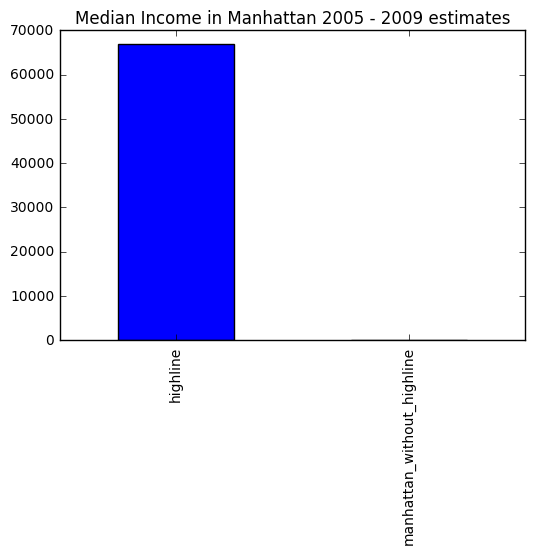

In [213]:
change.ix[0,['highline', 'manhattan_without_highline']].plot(kind= 'bar')
pl.title('Median Income in Manhattan 2005 - 2009 estimates')

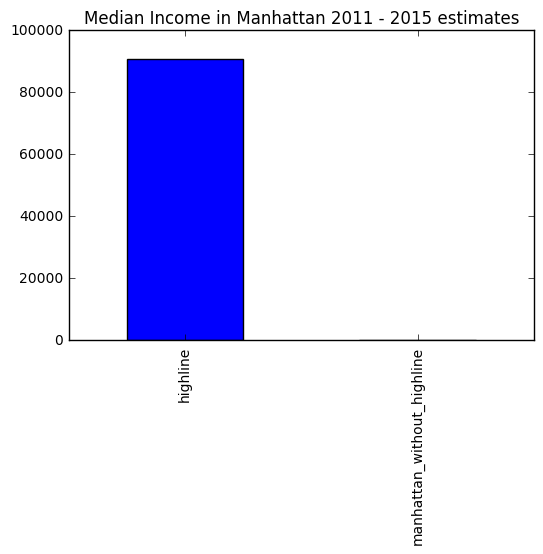

In [214]:
change.ix[1,['highline', 'manhattan_without_highline']].plot(kind= 'bar')
pl.title('Median Income in Manhattan 2011 - 2015 estimates')

In [215]:
somechange = change.T
somechange.rename(columns={0 : '2009', 1 : '2015'}, inplace=True)
somechange

,2009,2015
highline,66992.909091,90892.181818
manhattan without highline,62668.143426,69522.832669


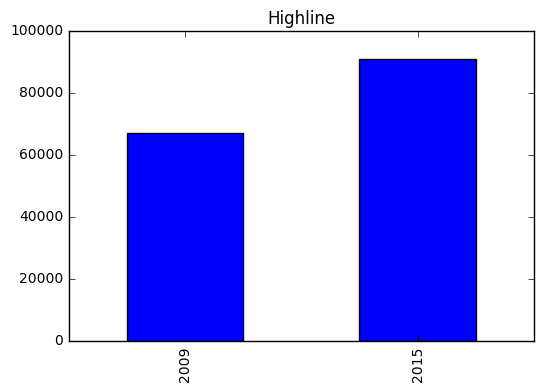

In [216]:
somechange.ix[0, ['2009', '2015']].plot(kind = 'bar')
pl.title('Highline')

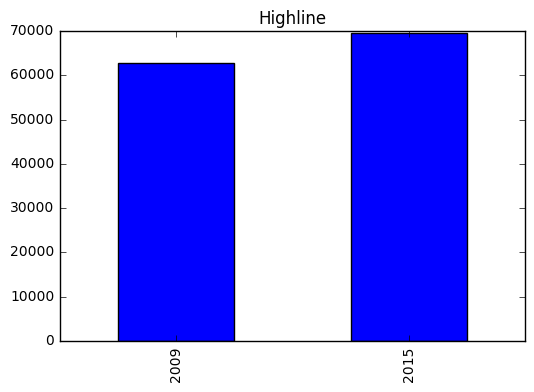

In [217]:
somechange.ix[1, ['2009', '2015']].plot(kind = 'bar')
pl.title('Highline')

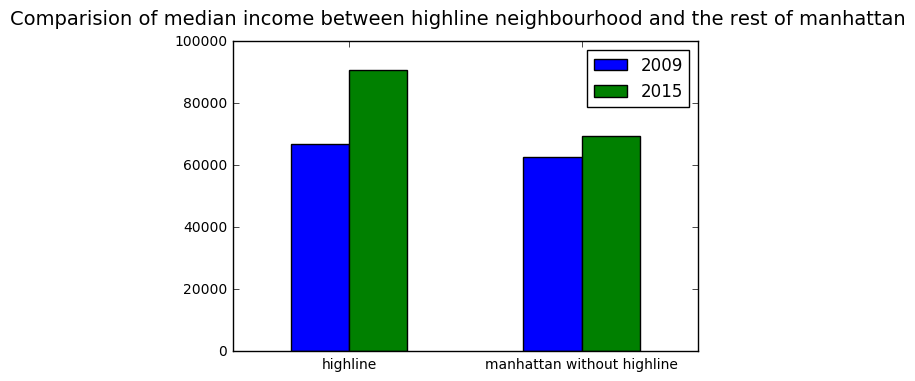

In [225]:
somechange.plot(kind = 'bar')
locs, labels = pl.xticks()
pl.setp(labels, rotation=0)
pl.suptitle('Comparision of median income between highline neighbourhood and the rest of manhattan', fontsize = 14)